# Data Science - Laboratorio 1
## Análisis Exploratorio, PCA y Apriori
---
**Integrantes**
- Diego Leiva
- Pablo Orellana
---

## Análisis Exploratorio

### Comprensión Inicial

#### Importar Librerías

In [1]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Librerias para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para PCA
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Librerias para preprocesamiento
from sklearn.preprocessing import StandardScaler

# libreiras para pipeline
from sklearn.pipeline import make_pipeline

# Librerias para reglas de asociacion
from apyori import apriori

#### Cargar el Dataset al entorno

Fernandes,Kelwin, Cardoso,Jaime, and Fernandes,Jessica. (2017). Cervical Cancer (Risk Factors). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z310.

In [2]:
data = pd.read_csv('risk_factors_cervical_cancer.csv')

#### Visualizar estructura e información general del dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
print(f"El dataset contiente: {data.shape[0]} observaciones y {data.shape[1]} variables")

El dataset contiente: 858 observaciones y 36 variables


In [5]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


**Variables identificadas**
- Age: Edad de la paciente 
- Number.of.sexual.partners: Cantidad de parejas sexuales que ha tenido la paciente desde que inició su vida sexual 
- First.sexual.intercourse: Edad a la que tuvo el primer encuentro sexual. 
- Num.of.pregnancies: Cantidad de embarazos 
- Smokes: Si fuma o no 
- Smokes.years: Años que lleva fumando 
- Smokes.packs.per.year: Cajetillas de cigarrillos por año que fuma la paciente 
- Hormonal.Contraceptives: Si usa anticonceptivos hormonales o no 
- Hormonal.Contraceptives.years: Años que lleva usando anticonceptivos hormonales 
- IUD: Si tiene colocado algún dispositivo intrauterino (DIU) 
- IUD.years: Años que lleva usando un DIU 
- STDs: Si ha tiene enfermedades de transmisión sexual (ETS) 
- STDs.number: Cuantas ETS ha tenido 
- STDs.condylomatosis: si ha tenido condilomatosis 
- STDs.cervical.condylomatosis: si ha tenido condilomatosis cervical 
- STDs.vaginal.condylomatosis: Si ha tenido condilomatosis vaginal 
- STDs.vulvo.perineal.condylomatosis: Si ha tenido condilomatosis vulvo perineal 
- STDs.syphilis: Si ha tenido Sífilis 
- STDs.pelvic.inflammatory.disease: Si ha tenido inflamaciones pélvicas 
- STDs.genital.herpes: si ha tenido herpes genital - STDs.molluscum.contagiosum: Si ha tenido molusco contagioso 
- STDs.AIDS: Si tiene SIDA 
- STDs.HIV: Si tiene VIH 
- STDs.Hepatitis.B: si ha tenido o tiene hepatitis B 
- STDs.HPV: Si ha tenido o tiene Virus del Papiloma Humano (VPH) 
- STDs.Number.of.diagnosis: Cantidad de diagnósticos de ETS 
- STDs.Time.since.first.diagnosis: Tiempo desde el primer diagnóstico 
- STDs.Time.since.last.diagnosis: Tiempo desde el último diagnóstico 
- Dx.Cancer: Si tiene diagnóstico de cáncer o no 
- Dx.CIN: Si tiene diagnóstico de NIC (Neoplasia Intraepitelial Cervical) 
- Dx.HPV: Si tiene diagnóstico de Virus del Papiloma Humano 
- Dx: Si tiene diagnóstico 
- Pruebas para diagnosticar 
- Hinselmann: Si hicieron Colposcopía 
- Schiller: Si hicieron la prueba de Schiller 
- Citology: Si hicieron citología o no. 
- Biopsy: Si hicieron Biopsia o no 

Nota: parece que los registros que no tienen datos estan marcados con el simbolo `?` por lo tanto sera necesario modificar esos registros para tener celdas vacias o nulas y manejarlas adecuadamente mas adelante.

In [6]:
data.replace('?', np.nan, inplace=True)

In [7]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


----
### Preprocesamiento y Limpieza de datos

#### Verificación y manejo de valores Nulos o faltantes

##### Visualizar la data faltante

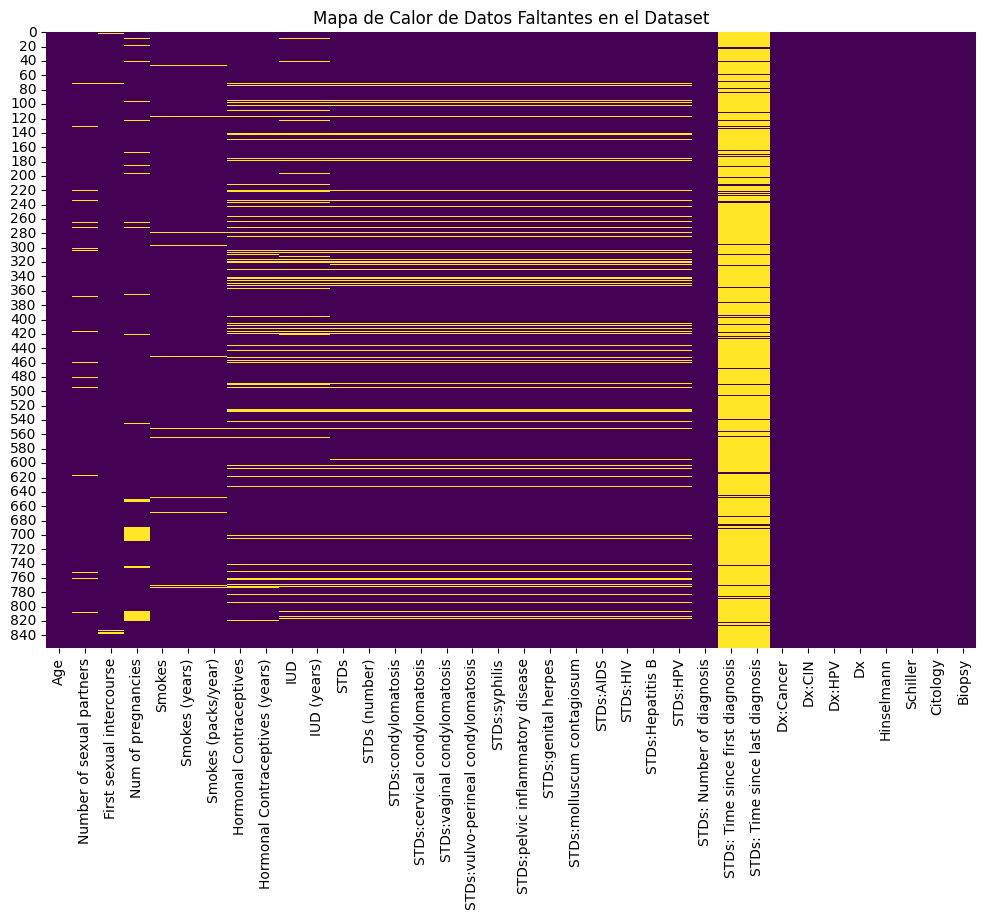

In [8]:
# Crear un mapa de calor para visualizar los datos faltante
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
plt.show()

##### Porcentaje de valores nulos

In [9]:
# Calcular el porcentaje de valores nulos para cada tipo
null_percentage_numeric = data.isnull().mean() * 100
print(f"Porcentaje de data faltante en variables numericas:")
print(null_percentage_numeric.sort_values(ascending=False))

Porcentaje de data faltante en variables numericas:
STDs: Time since first diagnosis      91.724942
STDs: Time since last diagnosis       91.724942
IUD                                   13.636364
IUD (years)                           13.636364
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
STDs:HPV                              12.237762
STDs:AIDS                             12.237762
STDs:Hepatitis B                      12.237762
STDs:HIV                              12.237762
STDs                                  12.237762
STDs:cervical condylomatosis          12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:vaginal condylomatosis           12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12.237762
STDs:condylomatosis                   12.237762
STDs (number)                       

Es evidente que hay 2 variables del dataset que tienen una mayor cantidad de valores faltantes. Las variables `STDs: Time since first diagnosis` y `STDs: Time since last diagnosis` carecen del mas del 90% de sus datos.


Asimismo hay 18 variables adicionales que tienen mas del 10% de sus valores faltantes.

##### Evaluación de impacto de eliminación de nulos

In [10]:
data_copy = data.copy()

# Eliminar filas con cualquier valor nulo
data_raw_clean = data_copy.dropna()

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_raw_clean.shape[0]
remaining_records_percentage = (remaining_records / data.shape[0]) * 100

print(f"Si se eliminacen todas las observaciones con valores nulos, \
      \nquedarian {remaining_records} registros, \
      \n{remaining_records_percentage:.2f}% de la data original")

Si se eliminacen todas las observaciones con valores nulos,       
quedarian 59 registros,       
6.88% de la data original


Esta claro que eliminar todos los registros nulos tiene un gran impacto sobre el dataset, dejando apenas un 6.88% de los datos originales, en consecuencia, se ha determinado que esta no es una acción viable para el análisis.

La accion a probar a continuacion será eliminar las variables con alto porcentaje de valores faltanes, y eliminar solo los registros de aquellas variables que tienen de un 10%+ de valores faltantes, y para aquellos con porcentajes menores imputar valores de media o moda para evitar perdida de datos, y protegerse contra un sesgo debido a la imputación de datos.

In [11]:
data_clean = data.copy()

# Convert columns to numeric where appropriate
for column in data_clean.columns:
    data_clean[column] = pd.to_numeric(data_clean[column], errors='coerce')

# Eliminar las variables con más del 50% de valores faltantes
threshold = 0.5
data_clean = data_clean[data_clean.columns[data_clean.isnull().mean() < threshold]]

# Imputar los valores faltantes con la media para variables continuas
# con menos de 10% de valores faltantes
mean_threshold = 10
for column in data_clean.columns:
    null_percentage = data_clean[column].isnull().mean() * 100
    if null_percentage < mean_threshold:
        median = data_clean[column].median()
        data_clean.fillna({column: median}, inplace=True)
    
# Eliminar las observaciones con valores faltantes para variables continuas
# con más de 10% de valores faltantes
data_clean = data_clean.dropna()

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_clean.shape[0]
remaining_records_percentage = (remaining_records / data.shape[0]) * 100

print(f"Si se eliminacen todas las observaciones con valores nulos, \
      \nquedarian {remaining_records} registros, \
      \n{remaining_records_percentage:.2f}% de la data original")


Si se eliminacen todas las observaciones con valores nulos,       
quedarian 734 registros,       
85.55% de la data original


In [12]:
data_clean.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Esta nueva estrategia tiene un impacto mucho menor que solo eliminar todos los registros con valores nulos. Ahora se conservan cerca del 90% de los datos originales en lugar de solo el 6%. 
La estrategia asegura la confiabilidad de los datos, al eliminar variables con grandes cantidades de valores nulos, y eliminar registros con valores nulos mayores al 10% se previene la incorporacion de un sesgo dentro de los datos. Asimismo, el imputar valores solo para aquellas variables bajo el 10% de valores faltantes previene que se pierdan mas registros, y al ser un porcentaje tan bajo, tambien se evita la creacion de sesgos.

#### Identificación de Variables

Para asegurarse de que los tipos de variables estan bien categorizados es necesaria una transformacion previa de los tipos de datos por medio de inferencia.

In [13]:
# Se convierten las variables a un tipo mas adecaudo
# por medio de inferencia
data_clean = data_clean.infer_objects()

# Si existen nulos la inferencia no se realizara
# por lo tanto se trata de convertir las variables    
for col in data_clean.columns:
    # convertir a integer
    try:
        data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce', downcast='integer')
    except ValueError:
        # convertir a float
        try:
            data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce', downcast='float')
        except ValueError:
            try:
                # convertir a fecha
                data_clean[col] = pd.to_datetime(data_clean[col], errors='coerce')
            except ValueError:
                # si no se puede convertir se deja como esta
                pass

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 734 non-null    int8   
 1   Number of sexual partners           734 non-null    int8   
 2   First sexual intercourse            734 non-null    int8   
 3   Num of pregnancies                  734 non-null    int8   
 4   Smokes                              734 non-null    int8   
 5   Smokes (years)                      734 non-null    float64
 6   Smokes (packs/year)                 734 non-null    float64
 7   Hormonal Contraceptives             734 non-null    int8   
 8   Hormonal Contraceptives (years)     734 non-null    float64
 9   IUD                                 734 non-null    int8   
 10  IUD (years)                         734 non-null    float64
 11  STDs                                734 non-null  

**Variables categóricas**

In [14]:
# Encontrar variables categoricas en el dataset
categorical = data_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables categoricas en el dataset:")
for column in categorical:
    print(f"- {column}")


# Contar las variables categoricas binarias en el dataset
binary_categorical = [col for col in categorical if data_clean[col].nunique() == 2]

print(f"\nHay {len(binary_categorical)} variables categoricas binarias en el dataset de :")
for column in binary_categorical:
    print(f"- {column}")

Hay 0 variables categoricas en el dataset:

Hay 0 variables categoricas binarias en el dataset de :


No hay variables categoricas dentro del dataset, probablemente se encuentren variables binarias representadas con numeros en lugar de strings.

**Variables numéricas**

In [15]:
# Encontrar variables numericas en el dataset de entreno
numerical = data_clean.select_dtypes(exclude=['object']).columns.tolist()

# Contar las variables cuantitativas binarias en el dataset de entreno
binary = [col for col in numerical if data_clean[col].nunique() == 2]

# Contar las variables cuantitativas continuas en el dataset de entreno
continuous = data_clean.select_dtypes(include=['float']).columns

# Contar las variables cuantitativas discretas en el dataset de entreno
discrete = [col for col in numerical if col not in continuous and col not in binary]


print(f"Hay {len(numerical)} variables cuantitativas en el dataset\n")
print(f"Hay {len(binary)} variables cuantitativas binarias en el dataset:")
for column in binary:
    print(f"- {column}")

print("\n","-"*35,"\n")

print(f"{len(discrete)} variables cuantitativas discretas:")
for column in discrete:
    print(f"- {column}")

print("\n","-"*35,"\n")

print(f"{len(continuous)} variables cuantitativas continuas:")
for column in continuous:
    print(f"- {column}")
print("-"*35)

Hay 34 variables cuantitativas en el dataset

Hay 22 variables cuantitativas binarias en el dataset:
- Smokes
- Hormonal Contraceptives
- IUD
- STDs
- STDs:condylomatosis
- STDs:vaginal condylomatosis
- STDs:vulvo-perineal condylomatosis
- STDs:syphilis
- STDs:pelvic inflammatory disease
- STDs:genital herpes
- STDs:molluscum contagiosum
- STDs:HIV
- STDs:Hepatitis B
- STDs:HPV
- Dx:Cancer
- Dx:CIN
- Dx:HPV
- Dx
- Hinselmann
- Schiller
- Citology
- Biopsy

 ----------------------------------- 

8 variables cuantitativas discretas:
- Age
- Number of sexual partners
- First sexual intercourse
- Num of pregnancies
- STDs (number)
- STDs:cervical condylomatosis
- STDs:AIDS
- STDs: Number of diagnosis

 ----------------------------------- 

4 variables cuantitativas continuas:
- Smokes (years)
- Smokes (packs/year)
- Hormonal Contraceptives (years)
- IUD (years)
-----------------------------------


Tal como se supuso anteriormente, las variables de "clasificacion binaria" estan representadas por numeros y no por strings.

In [16]:
# Contar las variables categoricas en el dataset de entreno
for column in numerical:
    print(data[column].value_counts())
    print('\n', '-'*35, '\n')

Age
23    54
18    50
21    46
20    45
19    44
25    39
24    39
26    38
28    37
30    35
17    35
27    33
29    33
22    30
35    29
33    28
31    27
34    24
36    24
16    23
15    21
32    18
37    17
41    13
40    12
39     9
38     9
44     6
42     6
45     6
14     5
43     5
46     3
52     2
49     2
48     2
70     2
51     1
59     1
79     1
47     1
84     1
13     1
50     1
Name: count, dtype: int64

 ----------------------------------- 

Number of sexual partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: count, dtype: int64

 ----------------------------------- 

First sexual intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
26.0      7
27.0      6
12.0      6
24.0      6
29.0      5
28.0      3
25.0      2
11.0      2
10.0      2
32.0      1
Name: count, dtype: i

### Correlación entre variables cuantitativas

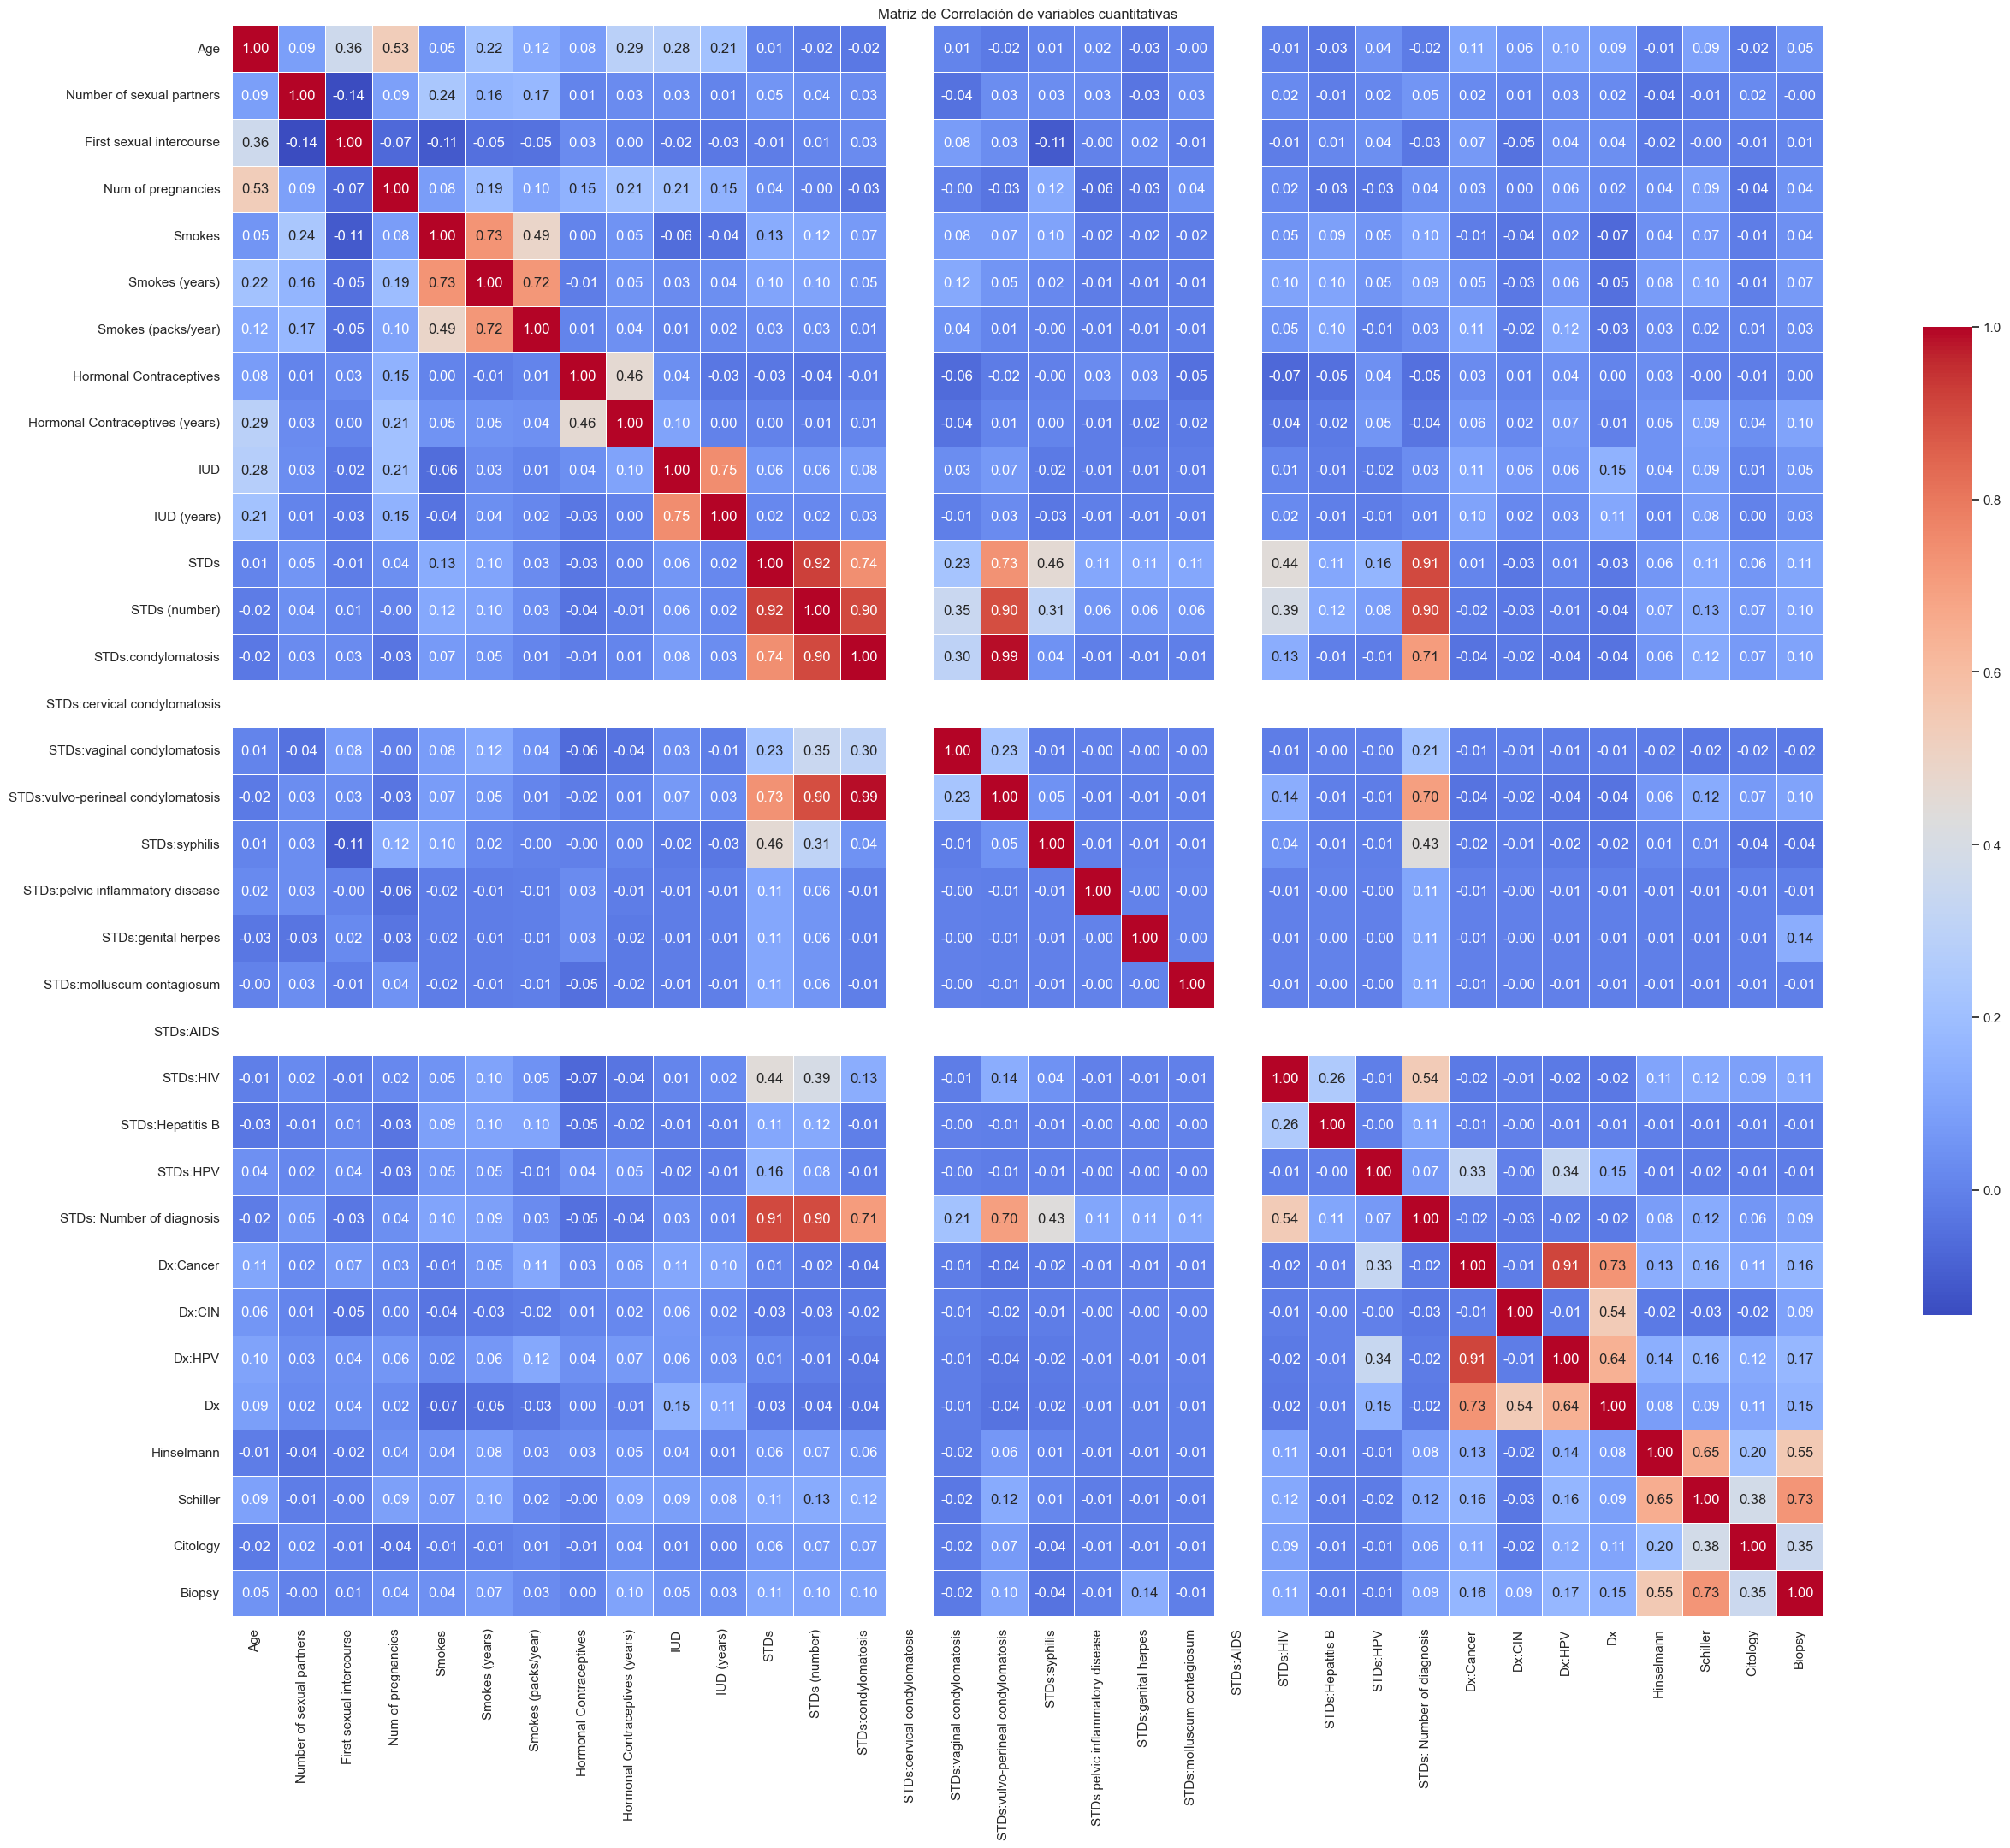

In [17]:
# Calcular la correlación entre las variables numéricas
correlation_matrix = data_clean.corr()

# Configurar el estilo de los gráficos
sns.set_theme(style="white")

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de Correlación de variables cuantitativas')
plt.show()

La mayoria de correlaciones presentes son obvias, por ejemplo la variable `STD's` indica si el paciente tiene o no este tipo de enfermedades, y por consiguiente tendra alta correlacion con la cantidad de diagnostivos o con la cantidad de enfermedades de transmision sexual que tenga el paciente.
Otro ejemplo es el `STD's: Number of Diagnostics` donde claramente tendra alta correlacion con la variable `STD's` o la cantidad de enfermedades que tenga el paciente.

Se eliminan variables `STD's: cervical condylomatosis` y `STD's: AIDS` del dataset debido a que no presentan correlacion alguna, ya que su unico valor conocido es de 0.

In [18]:
final_dataset = data_clean.drop(columns=["STDs:cervical condylomatosis", "STDs:AIDS"])

final_dataset.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,17,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


### Análisis General

#### Estadísticas descriptivas

In [19]:
final_dataset.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,...,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,27.249319,2.517711,17.096730,2.298365,0.141689,1.229696,0.458761,0.638965,2.225565,0.113079,...,0.002725,0.092643,0.024523,0.008174,0.023161,0.027248,0.046322,0.096730,0.055858,0.069482
std,8.722286,1.680995,2.823632,1.423664,0.348969,4.161395,2.307648,0.480628,3.645666,0.316905,...,0.052164,0.312758,0.154772,0.090103,0.150516,0.162916,0.210324,0.295792,0.229804,0.254446
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observaciones**
1. Edad: La media de la edad de los pacientes en el estudio es de aproximadamente 27 años
2. Parejas sexuales: En promedio los pacientes han tenido casi 3 parejas sexuales al momento del estudio.
3. Edad de la primera relacion sexual: En promedio los pacientes experimentaron una relacion sexual por primera vez a los 17 años.
4. Cantidad de embarazos: La media de embarazos en los pacientes es de 2.
5. Fumadores: La mayoria de pacientes no suele fumar.

#### Distribuciones de variables cuantitativas

In [20]:
# Encontrar variables numericas en el dataset de entreno
numerical = final_dataset.select_dtypes(exclude=['object']).columns.tolist()

# Contar las variables cuantitativas binarias en el dataset de entreno
binary = [col for col in numerical if final_dataset[col].nunique() == 2]

# Contar las variables cuantitativas continuas en el dataset de entreno
continuous = final_dataset.select_dtypes(include=['float']).columns

# Contar las variables cuantitativas discretas en el dataset de entreno
discrete = [col for col in numerical if col not in continuous and col not in binary]

##### Binarias

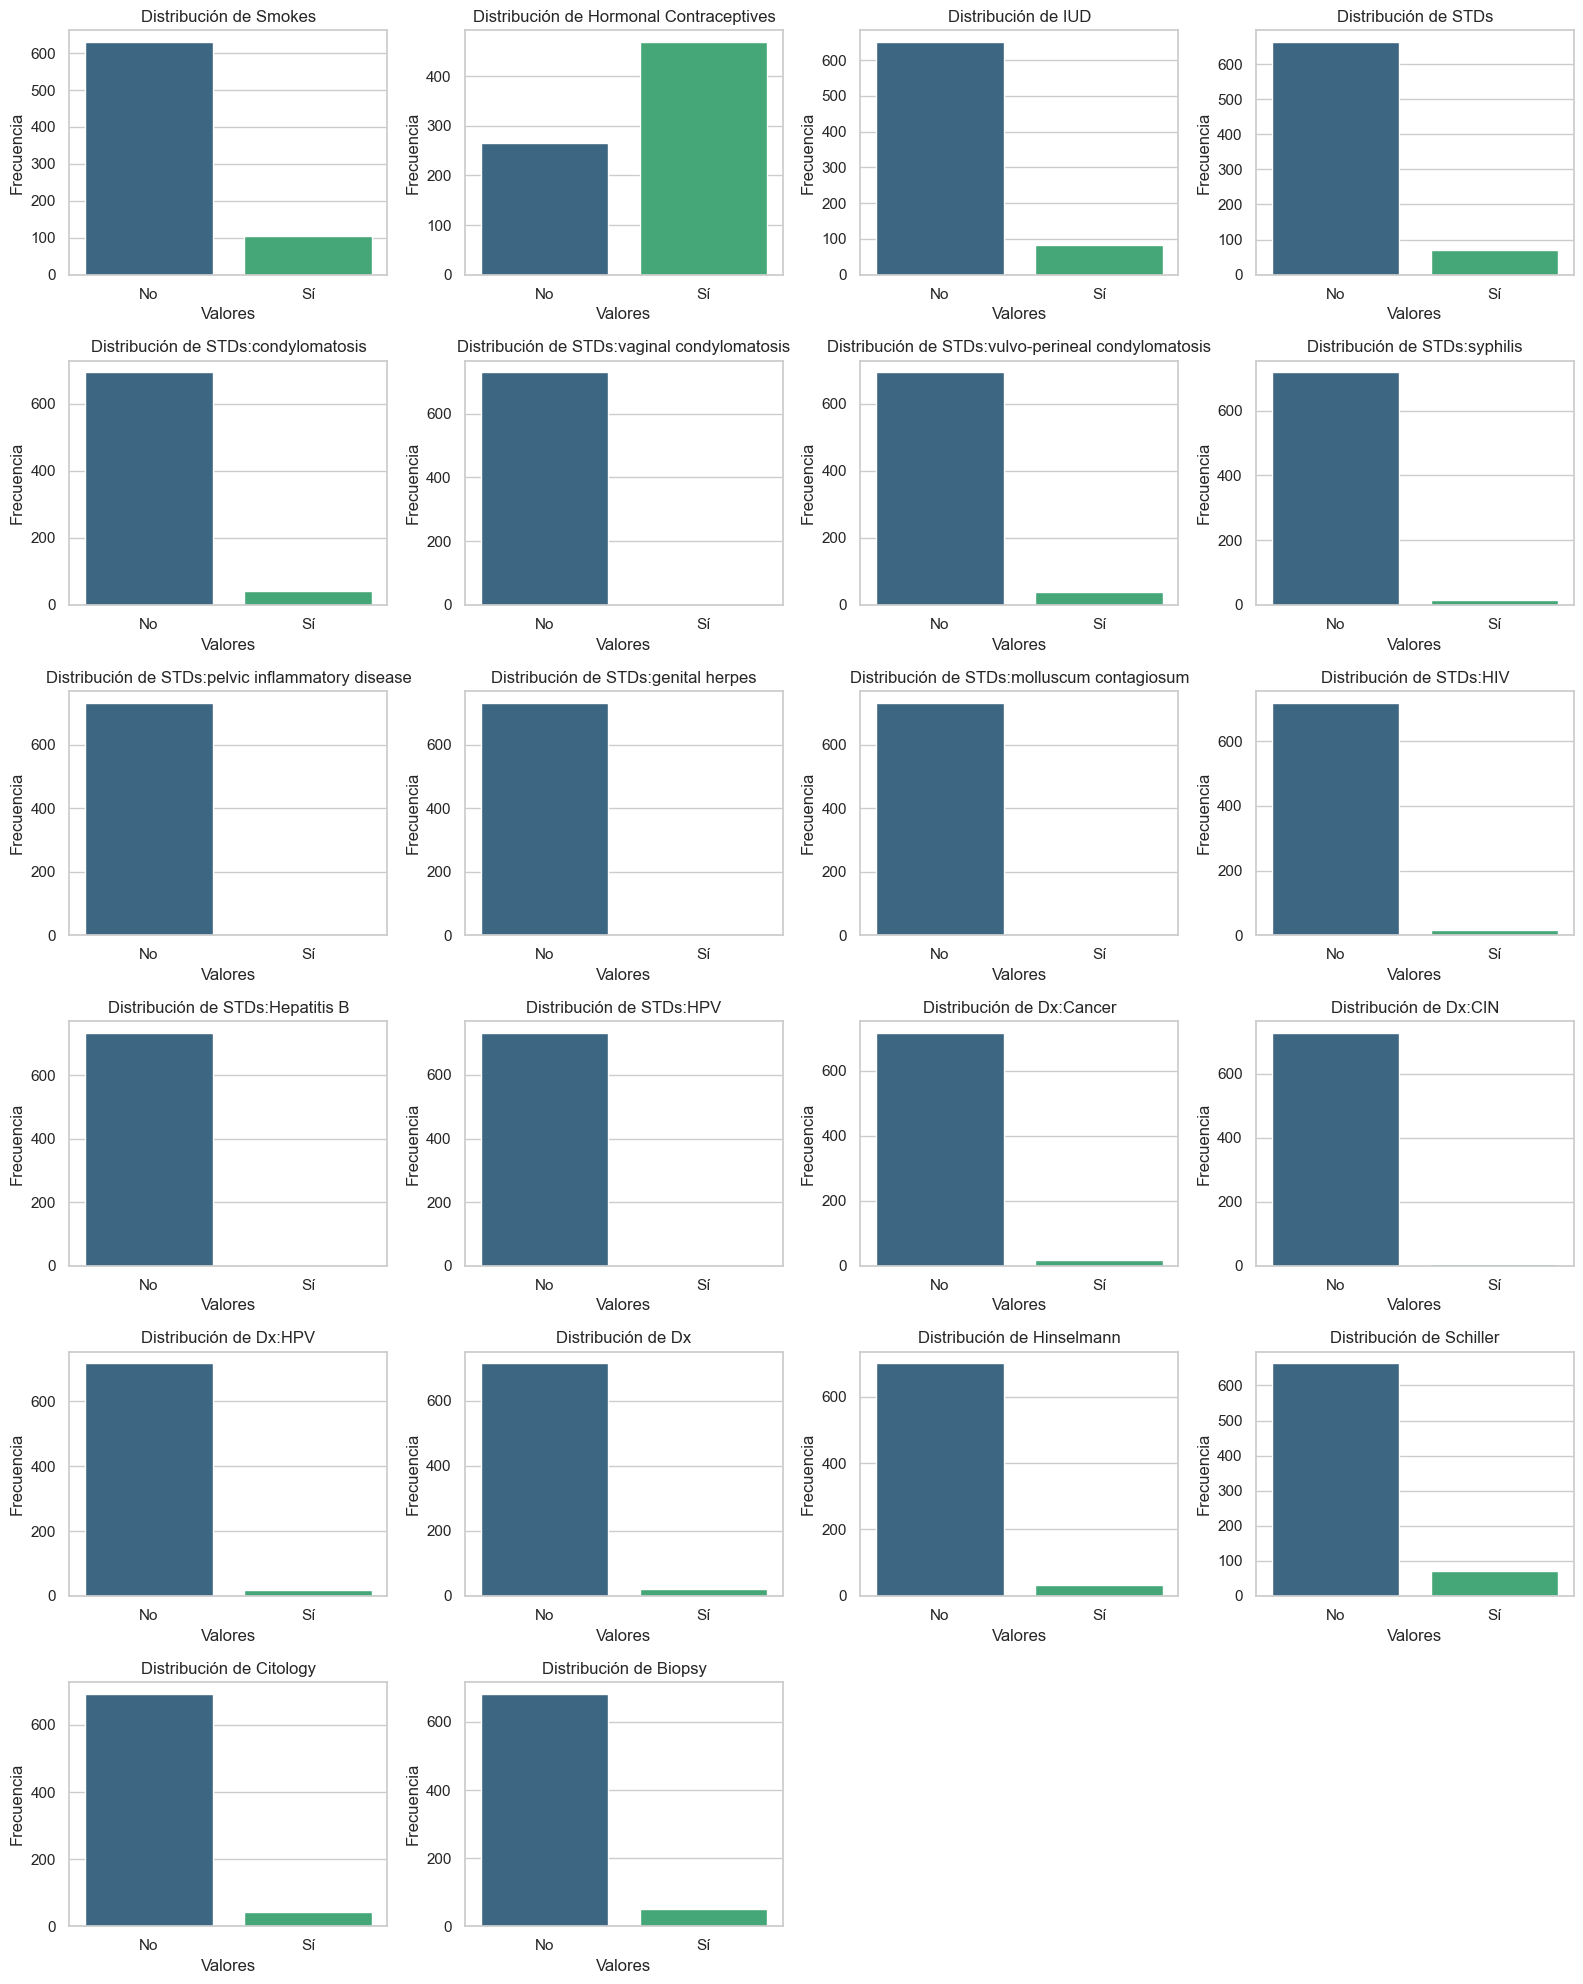

In [21]:
# Contar las variables cuantitativas binarias en el dataset de entreno
binary_qty = len(binary)

# Map binary values to "Sí" and "No"
data_mapped = final_dataset.copy()
data_mapped[binary] = data_mapped[binary].replace({1: 'Sí', 0: 'No'})

# Configuracion de la figura
sns.set_theme(style="whitegrid")

# Crear una figura para múltiples gráficos
fig, axes = plt.subplots((binary_qty + 3) // 4, 4, figsize=(16, 20))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Graficar la distribución de las variables binarias
for i, col in enumerate(binary):
    ax = axes[i]
    sns.countplot(x=data_mapped[col], hue=final_dataset[col], palette='viridis', ax=ax, legend=False)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frecuencia')

# Quitar los ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

Hay variables que tienen una discrepancia bastante evidente entre clases, en los graficos practicamente no se ven los conteos de si para 7 variables. En el conteo realizado anteriormente tambien se evidencio que tienen conteos en si en las unidades.
Debido por lo tanto seria recomendable omitir dichas variables pues el aporte es muy poco.

##### Continuas

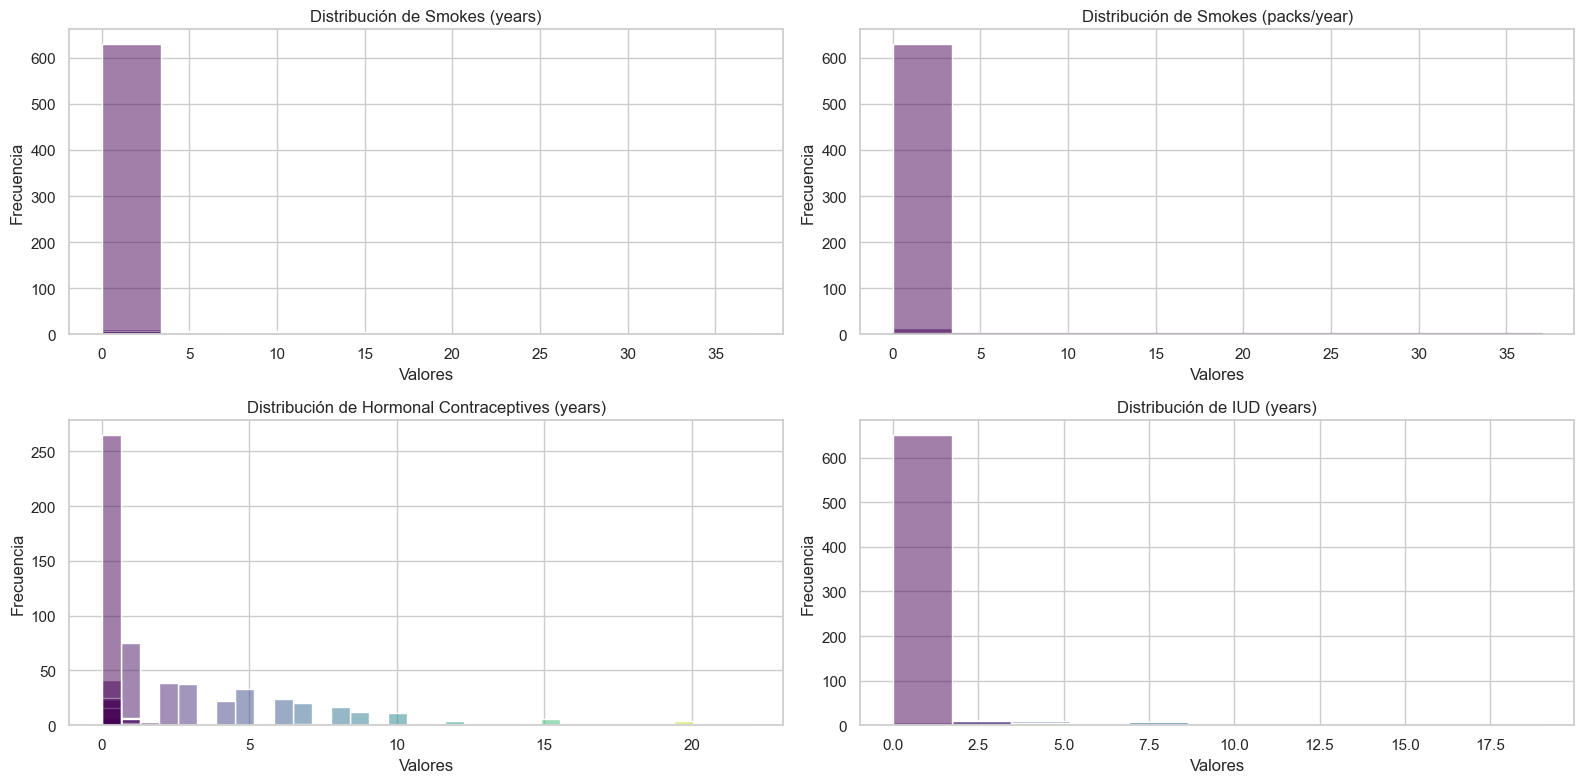

In [22]:
continuous_qty = len(continuous)
num_col = 2
num_rows = (continuous_qty + num_col - 1) // num_col

# Configuracion de la figura
sns.set_theme(style="whitegrid")

# Crear una figura para múltiples gráficos
fig, axes = plt.subplots(num_rows, num_col, figsize=(16, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each binary variable as a bar graph
for i, col in enumerate(continuous):
    ax = axes[i]
    sns.histplot(x=final_dataset[col], kde=True, hue=final_dataset[col], palette='viridis', ax=ax, legend=False)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frecuencia')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

Para estas variables la unica que parece tener un poco mas de variacion en sus datos en `Hormonal Contraceptives (years)` pues el resto tienen conteos tan pequeños que no son visibles en los graficos.
Por lo tanto es recomendable omitir las variables en el estudio.

##### Discretas

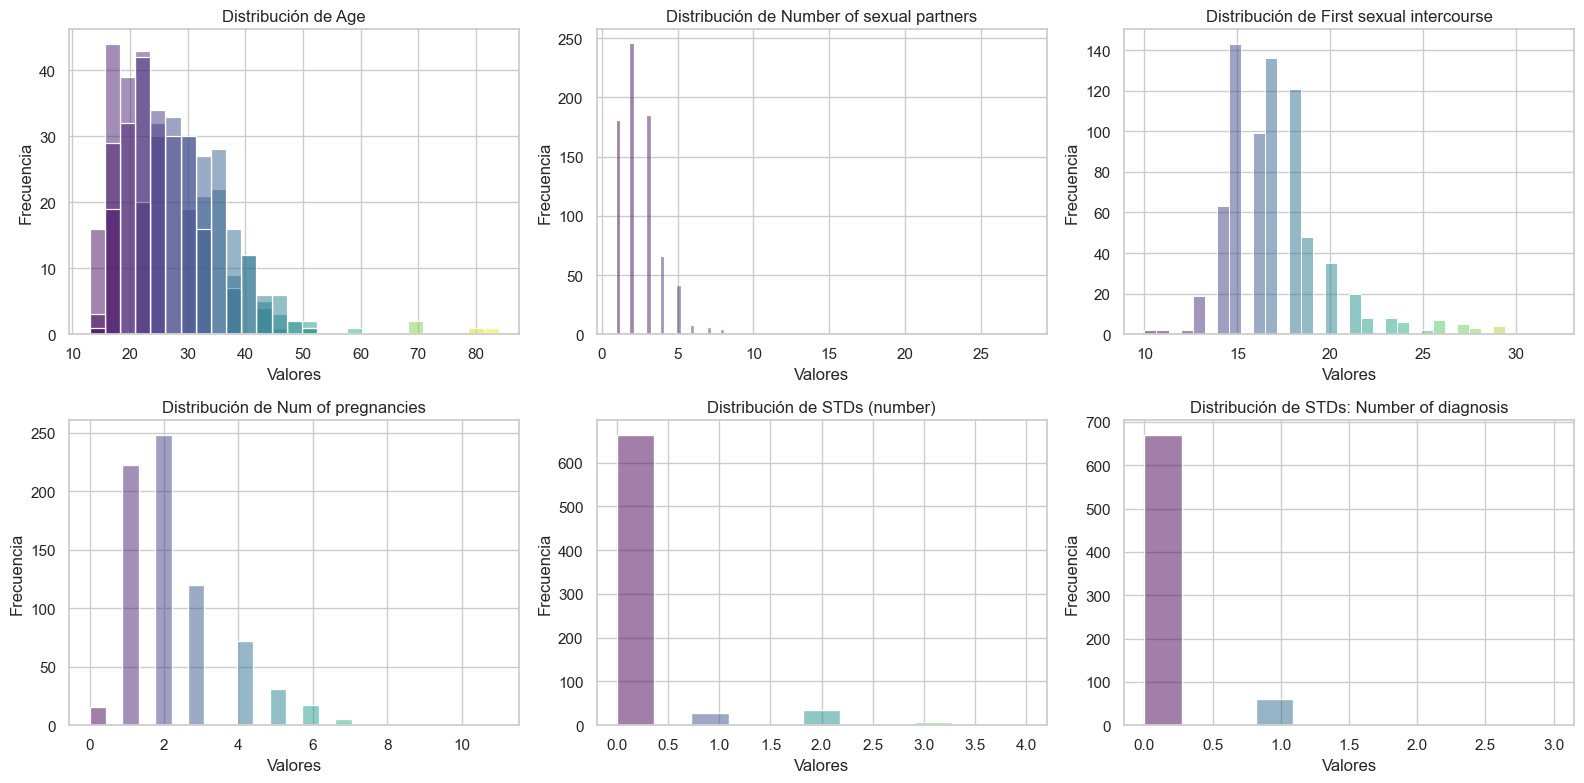

In [23]:
discrete_qty = len(discrete)
num_col = 3
num_rows = (discrete_qty + num_col - 1) // num_col

# Configuracion de la figura
sns.set_theme(style="whitegrid")

# Crear una figura para múltiples gráficos
fig, axes = plt.subplots(num_rows, num_col, figsize=(16, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each binary variable as a bar graph
for i, col in enumerate(discrete):
    ax = axes[i]
    sns.histplot(x=final_dataset[col], kde=True, hue=final_dataset[col], palette='viridis', ax=ax, legend=False)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frecuencia')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

#### Selección de Variable Objetivo y variables de entrada

In [24]:
important_features = ['Age', 
                      'Number of sexual partners', 
                      'First sexual intercourse', 
                      'Num of pregnancies', 
                      'Smokes (years)',
                      'Hormonal Contraceptives (years)',
                      'IUD (years)',
                      'STDs (number)',
                      'Dx:Cancer',
                      'Dx:CIN'
                    ]

In [25]:
study_data = final_dataset[important_features].copy()
#study_data = final_dataset.copy()
study_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number),Dx:Cancer,Dx:CIN
0,18,4,15,1,0.0,0.0,0.0,0,0,0
1,15,1,14,1,0.0,0.0,0.0,0,0,0
2,34,1,17,1,0.0,0.0,0.0,0,0,0
3,52,5,16,4,37.0,3.0,0.0,0,1,0
4,46,3,21,4,0.0,15.0,0.0,0,0,0


Las variables seleccionadas fueron elegidas debido a la variedad de datos que presentan y a su capacidad para proporcionar información valiosa. A diferencia de las variables binarias, que en su mayoría son redundantes y no aportan información adicional significativa, las variables seleccionadas permiten analizar de manera más efectiva el tiempo que los pacientes llevan con enfermedades o tratamientos, entre otros aspectos.

De acuerdo con la documentación oficial y los objetivos de la investigación, que buscan predecir la presencia de cáncer cervical, la variable objetivo será `Dx:CIN`, que corresponde a la Neoplasia Intraepitelial Cervical.

## PCA

#### Test de Esfericidad de Bartlett

In [26]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(study_data)
print(f"El valor de Chi-Cuadrado es: {chi_cuadrado:.2f}")
print(f"El valor de p es: {p_valor:.2f}")
if p_valor < 0.05:
    print("El test de esfericidad de Bartlett es significativo, por lo que se puede proceder con el análisis factorial")
else:
    print("El test de esfericidad de Bartlett no es significativo, por lo que no se puede proceder con el análisis factorial")

El valor de Chi-Cuadrado es: 689.88
El valor de p es: 0.00
El test de esfericidad de Bartlett es significativo, por lo que se puede proceder con el análisis factorial


#### Indice KMO

In [27]:
kmo, kmo_modelo = calculate_kmo(study_data)
print(f"El valor de KMO es: {kmo_modelo:.2f}")
if kmo_modelo > 0.6:
    print("El valor de KMO es adecuado para proceder con el análisis factorial")
else:
    print("El valor de KMO no es adecuado para proceder con el análisis factorial")

El valor de KMO es: 0.47
El valor de KMO no es adecuado para proceder con el análisis factorial


#### Análisis de Componentes Principales

In [28]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(study_data) #Se ajusta el modelo
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']

#Se convierte el arreglo en data frame
num_index = modelo_pca.components_.shape[0]
index = [f'PC{i+1}' for i in range(num_index)]

pd.DataFrame(
    data = modelo_pca.components_,
    columns = study_data.columns,
    index = index
)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number),Dx:Cancer,Dx:CIN
PC1,0.615693,0.147502,0.162428,0.527135,0.300344,0.336146,0.249388,0.024575,0.166794,0.033039
PC2,0.218081,-0.536898,0.667054,-0.138769,-0.381053,0.038539,-0.010403,-0.196777,0.117138,-0.026958
PC3,-0.002597,0.046956,0.332068,-0.157601,0.332468,-0.245622,-0.063979,0.589012,0.159232,-0.561634
PC4,-0.088445,-0.019293,-0.138841,-0.090978,-0.064445,-0.362214,0.689393,-0.093342,0.585002,0.051927
PC5,0.079445,-0.190709,0.102107,0.003438,0.008645,-0.229552,0.273392,0.559085,-0.396162,0.591480
PC6,0.008648,0.322827,0.220970,-0.289206,0.144199,0.051721,-0.408619,0.061158,0.509222,0.556556
PC7,-0.164362,-0.310404,-0.295371,-0.009081,-0.256784,0.624909,0.012699,0.481312,0.316489,-0.029527
PC8,0.081524,0.664275,0.192424,-0.121779,-0.618915,0.124520,0.208587,0.159966,-0.140328,-0.113513
PC9,0.084975,-0.030253,-0.136043,0.587768,-0.414562,-0.462522,-0.396708,0.173222,0.233904,0.001751
PC10,0.719907,-0.091062,-0.443936,-0.475101,-0.090445,-0.136669,-0.124827,0.038143,-0.007546,-0.081789


##### Representación de cada variable en las diferentes componentes

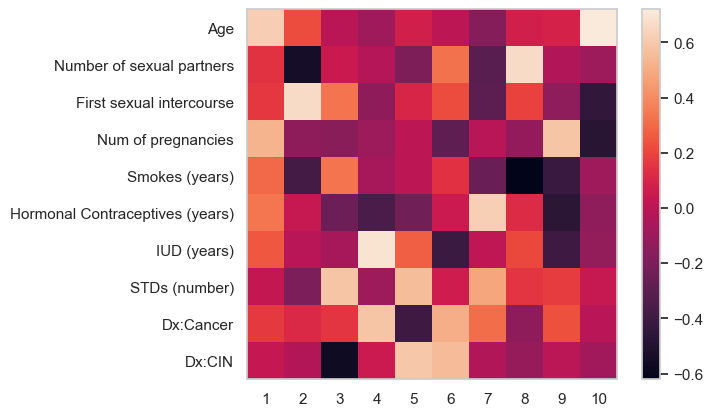

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(study_data.columns)), study_data.columns)
plt.xticks(range(len(study_data.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar()

##### Porcentaje de la varianza explicada por cada componente

In [30]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.1955017  0.128862   0.10865352 0.10358089 0.09816617 0.09517845
 0.09087458 0.08107774 0.06949467 0.02861028]


##### Scree plot

Text(0, 0.5, 'Por. varianza explicada')

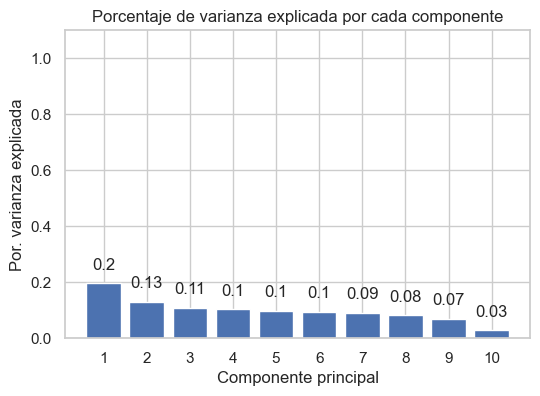

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(study_data.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.1955017  0.32436371 0.43301722 0.53659811 0.63476428 0.72994273
 0.8208173  0.90189505 0.97138972 1.        ]


Text(0, 0.5, 'Por. varianza acumulada')

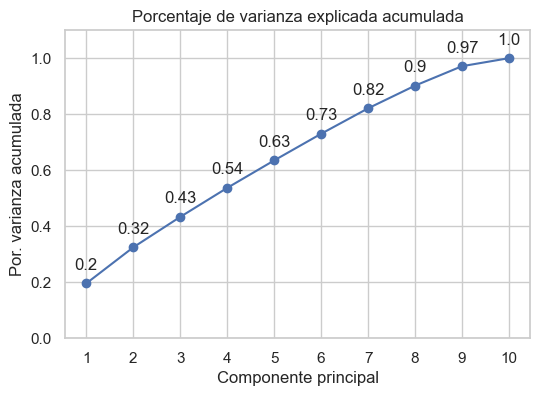

In [32]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(study_data.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(study_data.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

## Reglas de asociación

### Transformando los datos

In [33]:
print(study_data.shape)
# Se van a convertir los datos a una lista de listas
records = []

for i in range(0, 32):
    records.append([str(study_data.values[i,j]) for j in range(0, 5)]) 

print(records)


(734, 10)
[['18.0', '4.0', '15.0', '1.0', '0.0'], ['15.0', '1.0', '14.0', '1.0', '0.0'], ['34.0', '1.0', '17.0', '1.0', '0.0'], ['52.0', '5.0', '16.0', '4.0', '37.0'], ['46.0', '3.0', '21.0', '4.0', '0.0'], ['42.0', '3.0', '23.0', '2.0', '0.0'], ['51.0', '3.0', '17.0', '6.0', '34.0'], ['26.0', '1.0', '26.0', '3.0', '0.0'], ['45.0', '1.0', '20.0', '5.0', '0.0'], ['44.0', '3.0', '26.0', '4.0', '0.0'], ['27.0', '1.0', '17.0', '3.0', '0.0'], ['45.0', '4.0', '14.0', '6.0', '0.0'], ['44.0', '2.0', '25.0', '2.0', '0.0'], ['43.0', '2.0', '18.0', '5.0', '0.0'], ['40.0', '3.0', '18.0', '2.0', '0.0'], ['41.0', '4.0', '21.0', '3.0', '0.0'], ['43.0', '3.0', '15.0', '8.0', '0.0'], ['42.0', '2.0', '20.0', '2.0', '0.0'], ['40.0', '2.0', '27.0', '2.0', '0.0'], ['43.0', '2.0', '18.0', '4.0', '0.0'], ['41.0', '3.0', '17.0', '4.0', '0.0'], ['40.0', '1.0', '18.0', '1.0', '0.0'], ['40.0', '1.0', '20.0', '2.0', '0.0'], ['40.0', '3.0', '15.0', '3.0', '0.0'], ['44.0', '3.0', '19.0', '1.0', '0.0'], ['39.0', '5.

In [34]:
# El mínimo de cobertura o soporte es 20% y el mínimo de confianza es 70%
reglas_asociacion = apriori(records,min_support=0.2, min_confidence = 0.8)
reglas = list(reglas_asociacion)

In [35]:
print(f"Se crearon {len(reglas)} reglas con los umbrales especificados")

Se crearon 5 reglas con los umbrales especificados


In [36]:
print("Las reglas de asociacion son:")
for rule in reglas:
    print(rule)

Las reglas de asociacion son:
RelationRecord(items=frozenset({'0.0'}), support=0.875, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0.0'}), confidence=0.875, lift=1.0)])
RelationRecord(items=frozenset({'0.0', '1.0'}), support=0.3125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1.0'}), items_add=frozenset({'0.0'}), confidence=0.9090909090909091, lift=1.0389610389610389)])
RelationRecord(items=frozenset({'0.0', '2.0'}), support=0.34375, ordered_statistics=[OrderedStatistic(items_base=frozenset({'2.0'}), items_add=frozenset({'0.0'}), confidence=1.0, lift=1.1428571428571428)])
RelationRecord(items=frozenset({'0.0', '3.0'}), support=0.375, ordered_statistics=[OrderedStatistic(items_base=frozenset({'3.0'}), items_add=frozenset({'0.0'}), confidence=0.8, lift=0.9142857142857144)])
RelationRecord(items=frozenset({'4.0', '0.0'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'4.0'}), items_add=frozenset({'0.0'}), con

In [37]:
output = list(reglas)


def inspect(output):
    lhs, rhs, support, confidence, lift = [], [], [], [], []
    for result in output:
        try:
            lhs.append(tuple(result[2][0][0])[0])
            rhs.append(tuple(result[2][0][1])[0])
            support.append(result[1])
            confidence.append(result[2][0][2])
            lift.append(result[2][0][3])
        except IndexError:
            print(f"Error processing result: {result}")
    return list(zip(lhs, rhs, support, confidence, lift))

output_DataFrame = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_DataFrame

Error processing result: RelationRecord(items=frozenset({'0.0'}), support=0.875, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0.0'}), confidence=0.875, lift=1.0)])


,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,1.0,0.0,0.31250,0.909091,1.038961
1,2.0,0.0,0.34375,1.000000,1.142857
2,3.0,0.0,0.37500,0.800000,0.914286
3,4.0,0.0,0.25000,0.888889,1.015873
